<a href="https://colab.research.google.com/github/Chinmay-1907/Fuel_Efficiency_Model/blob/main/GreenDrive_Automotive_MPG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data from the provided files
data_path = 'AutoMPG_Data.csv'


# Load the data
auto_mpg_data = pd.read_csv(data_path)
auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
auto_mpg_data.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Check the data type of each column
auto_mpg_data.dtypes


,0
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,object
Weight,float64
Acceleration,float64
Model Year,int64
Origin,int64
Car Name,object


According to the Dictionary Horsepower should be a float64 not an object data type so lets change that and address that issue

In [ ]:
# Convert Horsepower to numeric with coercion for errors
auto_mpg_data['Horsepower'] = pd.to_numeric(auto_mpg_data['Horsepower'], errors='coerce')

# Fill NaN values with a numeric 0
auto_mpg_data['Horsepower'] = auto_mpg_data['Horsepower'].fillna(0)

# Verify the dtype is float64
auto_mpg_data.dtypes


,0
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,float64
Acceleration,float64
Model Year,int64
Origin,int64
Car Name,object


In [ ]:

# Get rows where horsepower is 0
zero_horsepower_rows = auto_mpg_data[auto_mpg_data['Horsepower'] == 0]

# Display the result
zero_horsepower_rows

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,0.0,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,0.0,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,0.0,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,0.0,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,0.0,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,0.0,3035.0,20.5,82,1,amc concord dl


In [ ]:

print(f"Number of cars with 0 horsepower: {len(zero_horsepower_rows)}")

Percent_of_Total = (len(zero_horsepower_rows) / len(auto_mpg_data)) * 100
print(f"Percentage of cars with 0 horsepower: {Percent_of_Total:.2f}%")

Number of cars with 0 horsepower: 6
Percentage of cars with 0 horsepower: 1.51%


In [ ]:
auto_mpg_data = auto_mpg_data[auto_mpg_data['Horsepower'] != 0]

In [ ]:
auto_mpg_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# One-hot encode the 'Origin' column
auto_mpg_data = pd.get_dummies(auto_mpg_data, columns=['Origin'], prefix='', prefix_sep='')

# Rename the one-hot encoded columns for clarity
auto_mpg_data = auto_mpg_data.rename(columns={
    1: 'American',
    2: 'European',
    3: 'Japanese'
})

auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Car Name,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,True,False,False


In [ ]:
auto_mpg_data = auto_mpg_data.rename(columns={
    '1': 'American',
    '2': 'European',
    '3': 'Japanese'
})

# Assuming 'American', 'European', and 'Japanese' columns represent boolean values
auto_mpg_data['American'] = auto_mpg_data['American'].astype(int)
auto_mpg_data['European'] = auto_mpg_data['European'].astype(int)
auto_mpg_data['Japanese'] = auto_mpg_data['Japanese'].astype(int)

auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Car Name,American,European,Japanese
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,1,0,0


In [ ]:
# Save the dataset as a CSV file
auto_mpg_data.to_csv('auto_mpg_data_processed.csv', index=False) # Used for the Power BI Dashboard

In [ ]:
highest_mpg_row = auto_mpg_data[auto_mpg_data['MPG'] == auto_mpg_data['MPG'].max()]

# Display the row
print(highest_mpg_row)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
322  46.6          4          86.0        65.0  2110.0          17.9   

     Model Year   Car Name  American  European  Japanese  
322          80  mazda glc         0         0         1  


In [ ]:
auto_mpg_data.drop(columns=['American'], inplace=True)
auto_mpg_data.drop(columns=['Car Name'], inplace=True)


In [ ]:
auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,European,Japanese
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0


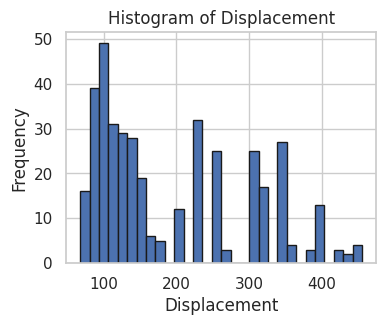

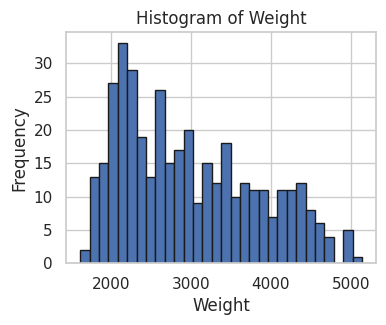

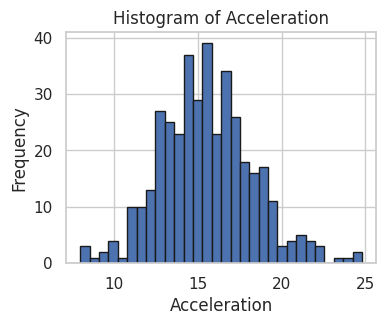

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create histograms for each numerical feature
numerical_features = ['Displacement', 'Weight', 'Acceleration',]

for feature in numerical_features:
    plt.figure(figsize=(4, 3))  # Adjust figure size as needed
    plt.hist(auto_mpg_data[feature], bins=30, edgecolor='k')  # Adjust bins as needed
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)  # Add grid for better visualization
    plt.show()

<ipython-input-71-79b7fa3469c2>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn')  # Red-Yellow-Green colormap


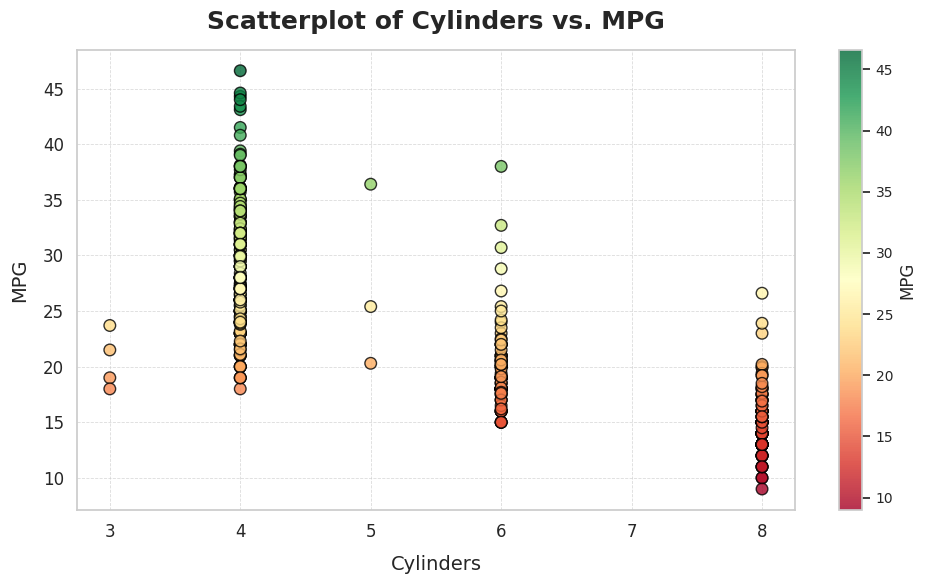

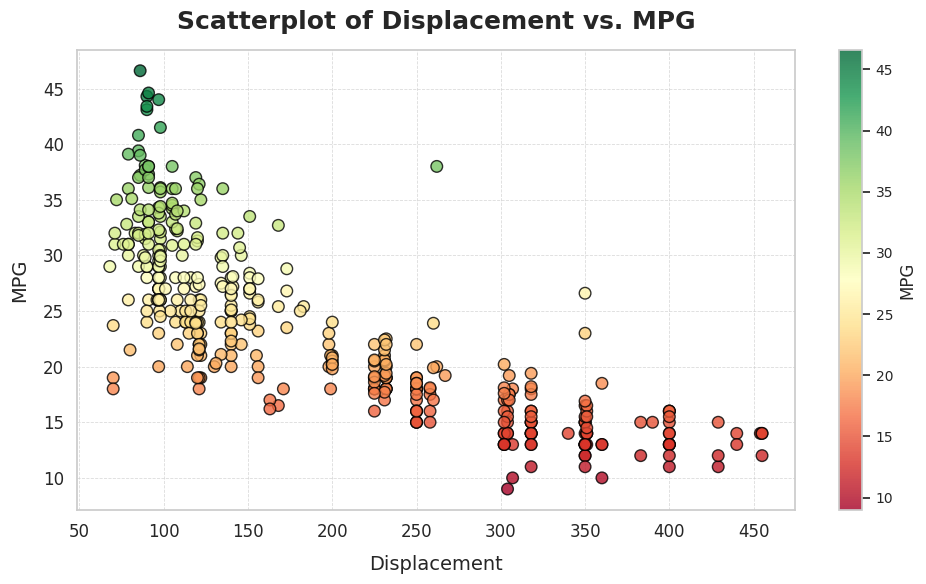

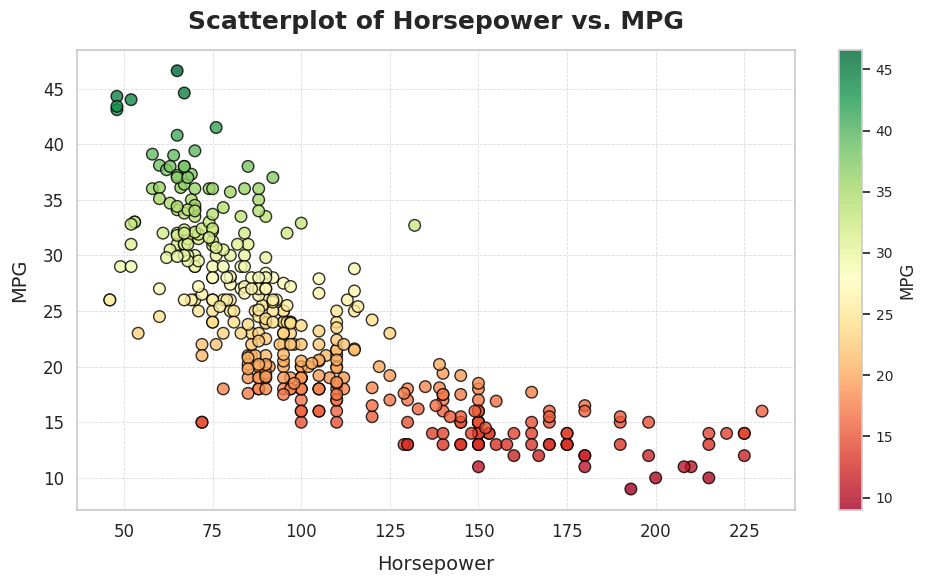

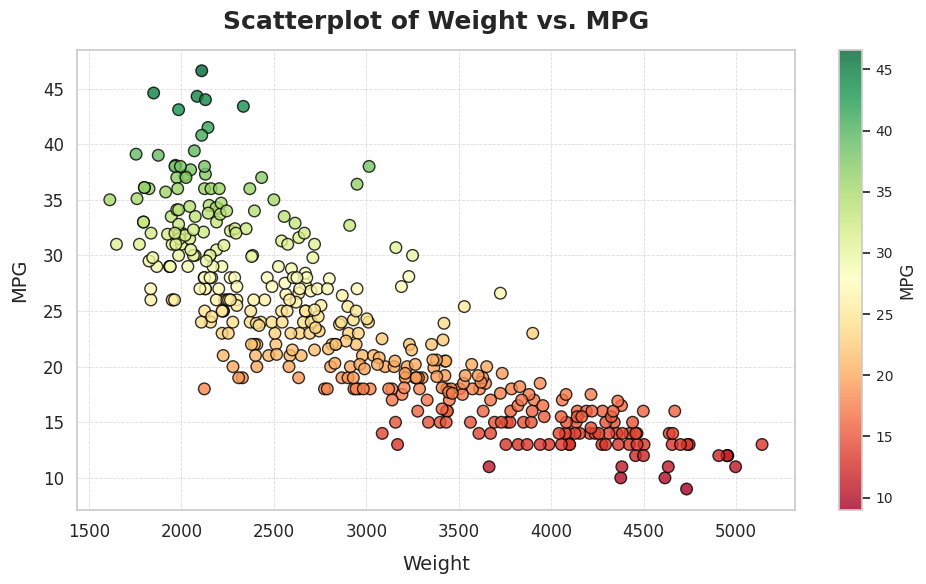

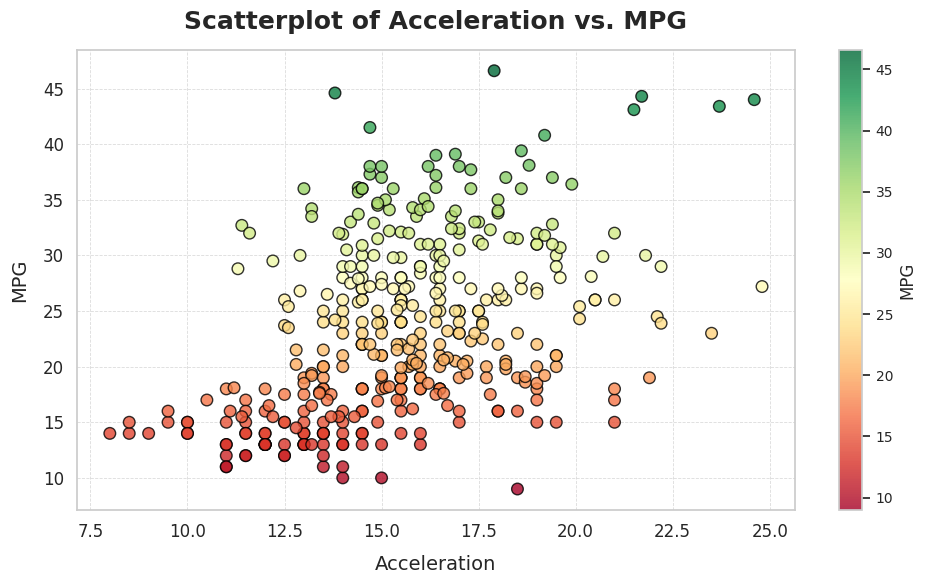

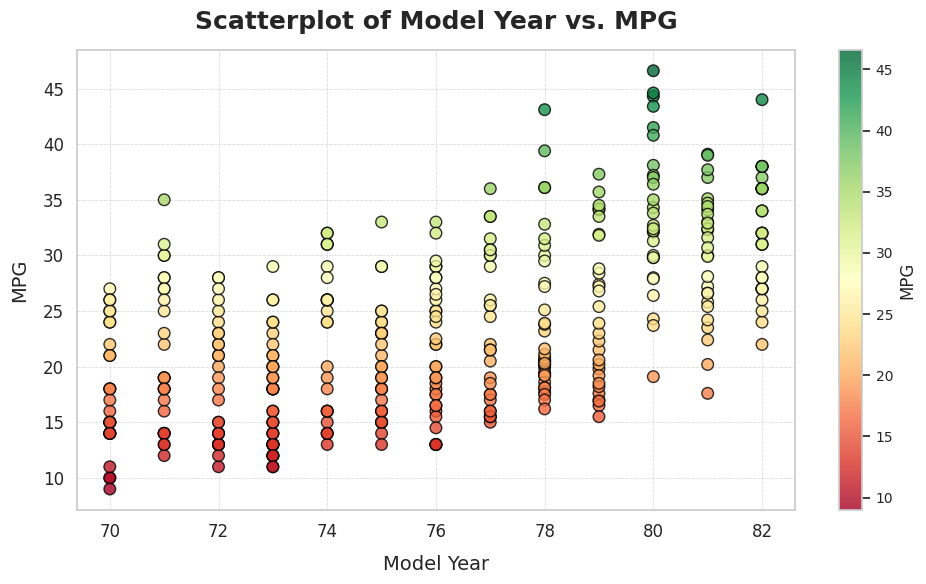

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Assuming 'auto_mpg_data' is your DataFrame
predictors = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']

# Normalize MPG values for color mapping
norm = plt.Normalize(auto_mpg_data['MPG'].min(), auto_mpg_data['MPG'].max())
cmap = cm.get_cmap('RdYlGn')  # Red-Yellow-Green colormap

for predictor in predictors:
    plt.figure(figsize=(10, 6))

    # Create scatterplot with color-mapped points
    scatter = plt.scatter(
        x=auto_mpg_data[predictor],
        y=auto_mpg_data['MPG'],
        c=auto_mpg_data['MPG'],  # Color by MPG
        cmap=cmap,  # Use the Red-Yellow-Green colormap
        norm=norm,  # Normalize MPG values for consistent coloring
        s=70,  # Size of markers
        edgecolor="black",  # Marker borders
        alpha=0.8  # Transparency
    )

    # Add colorbar to show the scale of MPG
    cbar = plt.colorbar(scatter)
    cbar.set_label('MPG', fontsize=12)
    cbar.ax.tick_params(labelsize=10)

    # Add titles and labels with better formatting
    plt.title(f'Scatterplot of {predictor} vs. MPG', fontsize=18, fontweight='bold', pad=15)
    plt.xlabel(predictor, fontsize=14, labelpad=10)
    plt.ylabel('MPG', fontsize=14, labelpad=10)

    # Customize ticks for better readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add subtle gridlines
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.6, alpha=0.7)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


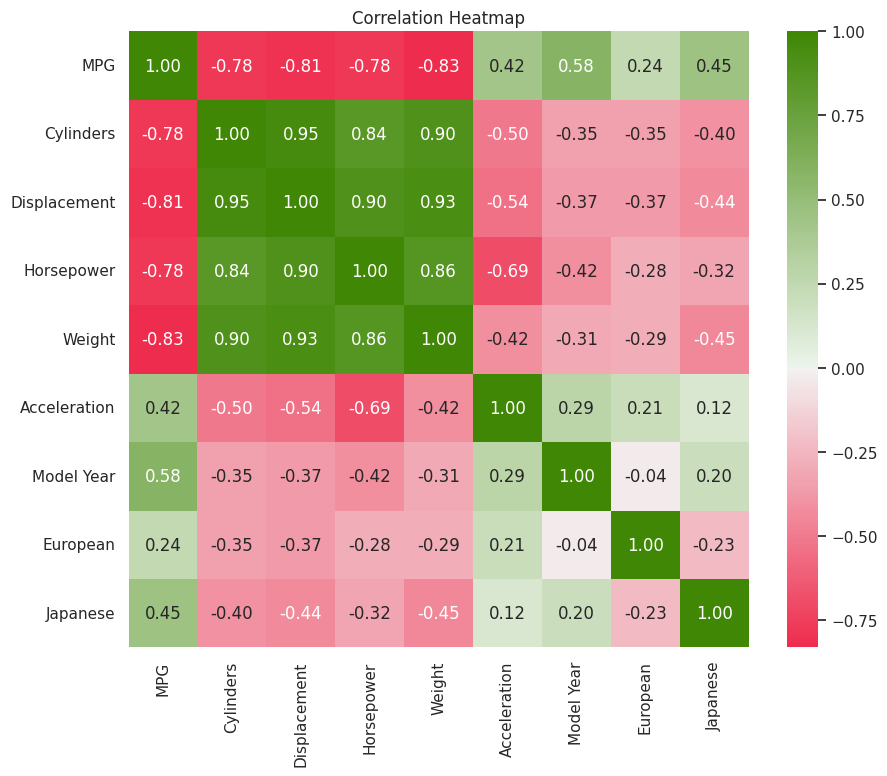

In [ ]:
# Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a custom diverging colormap
cmap = sns.diverging_palette(10, 120, s=99, l=50, as_cmap=True)  # Dark red to bright green


# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = auto_mpg_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", center=0)  # 'center=0' ensures diverging palette
plt.title('Correlation Heatmap')
plt.show()

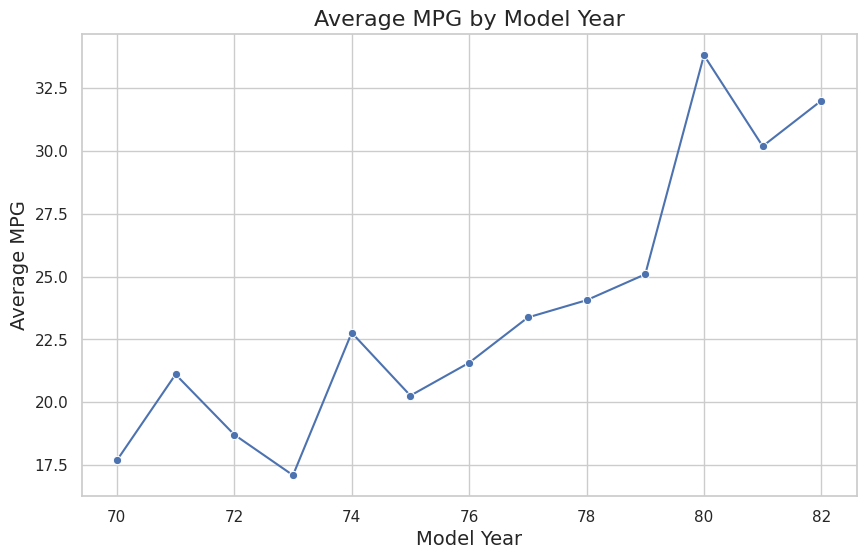

In [ ]:
avg_mpg_by_year = auto_mpg_data.groupby('Model Year')['MPG'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='MPG', data=avg_mpg_by_year, marker='o')
plt.title('Average MPG by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Average MPG', fontsize=14)
plt.show()



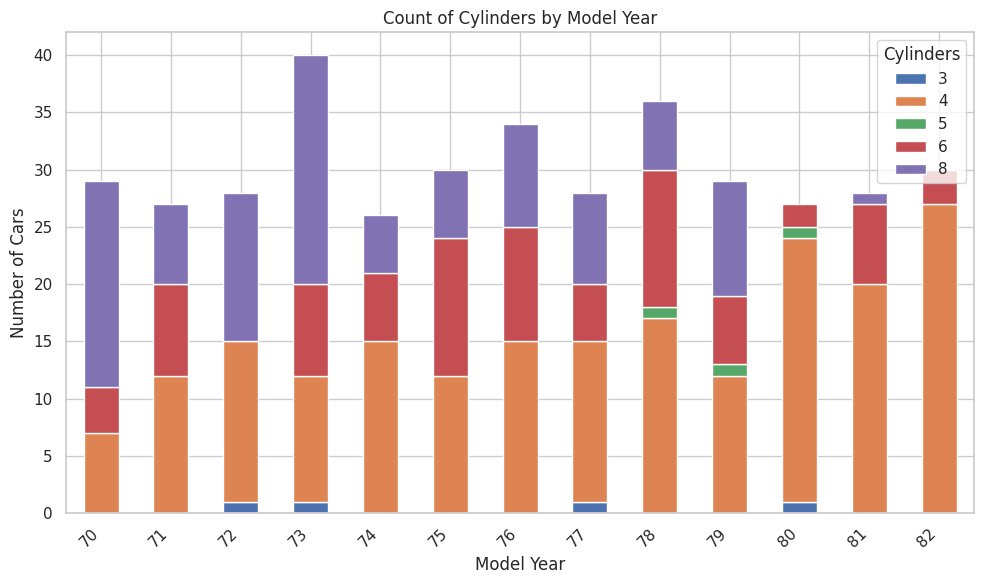

In [ ]:

cyl_year = auto_mpg_data.groupby(['Model Year', 'Cylinders'])['Cylinders'].count().unstack()
cyl_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Cylinders by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cylinders')
plt.tight_layout()
plt.show()

In [ ]:
auto_mpg_data['Efficiency_Metric'] = auto_mpg_data['Displacement'] / auto_mpg_data['Weight']
auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,European,Japanese,Efficiency_Metric
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,0.087614
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,0.094774
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,0.092549
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,0.088552
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,0.087562


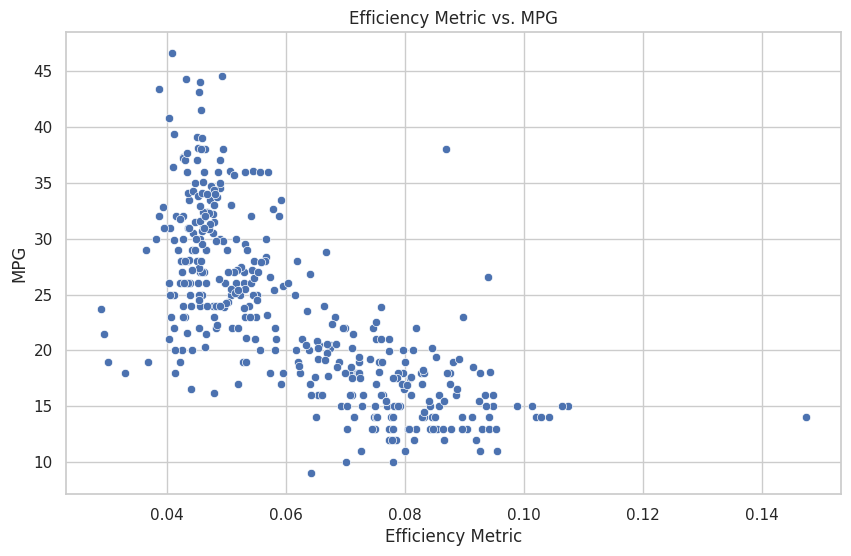

In [ ]:


# Create the Efficiency Metric plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Efficiency_Metric', y='MPG', data=auto_mpg_data)
plt.title('Efficiency Metric vs. MPG')
plt.xlabel('Efficiency Metric')
plt.ylabel('MPG')
plt.show()


In [ ]:
auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,European,Japanese,Efficiency_Metric
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,0.087614
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,0.094774
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,0.092549
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,0.088552
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,0.087562


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Normalize Displacement, Weight, and Acceleration
columns_to_normalize = ['Displacement', 'Weight', 'Acceleration']
scaler = MinMaxScaler()
auto_mpg_data[columns_to_normalize] = scaler.fit_transform(auto_mpg_data[columns_to_normalize])



# Standardize Horsepower
scaler = StandardScaler()
auto_mpg_data['Horsepower'] = scaler.fit_transform(auto_mpg_data[['Horsepower']])

In [ ]:


# Display the updated DataFrame
auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,European,Japanese,Efficiency_Metric
0,18.0,8,0.617571,0.664133,0.536150,0.238095,70,0,0,0.087614
1,15.0,8,0.728682,1.574594,0.589736,0.208333,70,0,0,0.094774
2,18.0,8,0.645995,1.184397,0.516870,0.178571,70,0,0,0.092549
3,16.0,8,0.609819,1.184397,0.516019,0.238095,70,0,0,0.088552
4,17.0,8,0.604651,0.924265,0.520556,0.148810,70,0,0,0.087562


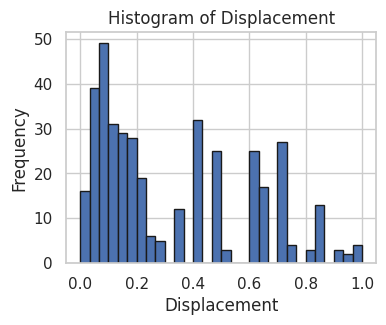

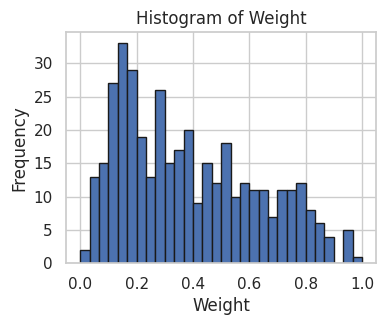

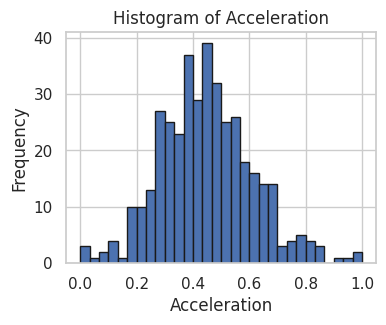

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt



# Create histograms for each numerical feature
numerical_features = ['Displacement', 'Weight', 'Acceleration',]

for feature in numerical_features:
    plt.figure(figsize=(4, 3))  # Adjust figure size as needed
    plt.hist(auto_mpg_data[feature], bins=30, edgecolor='k')  # Adjust bins as needed
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)  # Add grid for better visualization
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = auto_mpg_data.drop(columns=['MPG'])  # Drop target column
y = auto_mpg_data['MPG']                # Target variable

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (313, 9), Testing set size: (79, 9)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")



print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Linear Regression Performance:
Mean Absolute Error: 2.63
Mean Squared Error: 12.82
R² Score: 0.83


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Decision Tree Performance:
Mean Absolute Error: 2.70
Mean Squared Error: 13.87
R² Score: 0.81


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Random Forest Performance:
Mean Absolute Error: 2.11
Mean Squared Error: 8.37
R² Score: 0.89


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.25, max_depth=4, random_state=5)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Gradient Boosting Regressor Performance:
Mean Absolute Error: 2.18
Mean Squared Error: 8.19
R² Score: 0.89


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=5) #Changes were made to these parameters accoridng to our parameter search below

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")



XGBoost Regressor Performance:
Mean Absolute Error: 2.04
Mean Squared Error: 7.43
RMSE: 2.73
R² Score: 0.90


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.25],
    'max_depth': [3, 5, 7, 9],
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['learning_rate'],
    param_grid['max_depth'],
))

best_rmse = float('inf')
best_params = None

# Iterate over all parameter combinations
for params in param_combinations:
    n_estimators, learning_rate, max_depth = params

    # Initialize the model with the current parameter set
    model = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print results for this parameter set
    print(f"Params: n_estimators={n_estimators}, learning_rate={learning_rate}, "
          f"max_depth={max_depth}"
          f"RMSE={rmse:.4f}")

    # Update best parameters if current RMSE is lower
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print the best parameter set and its RMSE
print("\nBest Parameters:")
print(f"n_estimators={best_params[0]}, learning_rate={best_params[1]}, "
      f"max_depth={best_params[2]}")
print(f"Best RMSE: {best_rmse:.4f}")


Params: n_estimators=100, learning_rate=0.01, max_depth=3RMSE=4.8612
Params: n_estimators=100, learning_rate=0.01, max_depth=5RMSE=4.8920
Params: n_estimators=100, learning_rate=0.01, max_depth=7RMSE=5.1753
Params: n_estimators=100, learning_rate=0.01, max_depth=9RMSE=5.2453
Params: n_estimators=100, learning_rate=0.05, max_depth=3RMSE=3.0010
Params: n_estimators=100, learning_rate=0.05, max_depth=5RMSE=2.7966
Params: n_estimators=100, learning_rate=0.05, max_depth=7RMSE=3.1252
Params: n_estimators=100, learning_rate=0.05, max_depth=9RMSE=3.3113
Params: n_estimators=100, learning_rate=0.1, max_depth=3RMSE=2.8731
Params: n_estimators=100, learning_rate=0.1, max_depth=5RMSE=2.8647
Params: n_estimators=100, learning_rate=0.1, max_depth=7RMSE=3.1934
Params: n_estimators=100, learning_rate=0.1, max_depth=9RMSE=3.3056
Params: n_estimators=100, learning_rate=0.25, max_depth=3RMSE=3.0857
Params: n_estimators=100, learning_rate=0.25, max_depth=5RMSE=2.8551
Params: n_estimators=100, learning_rat

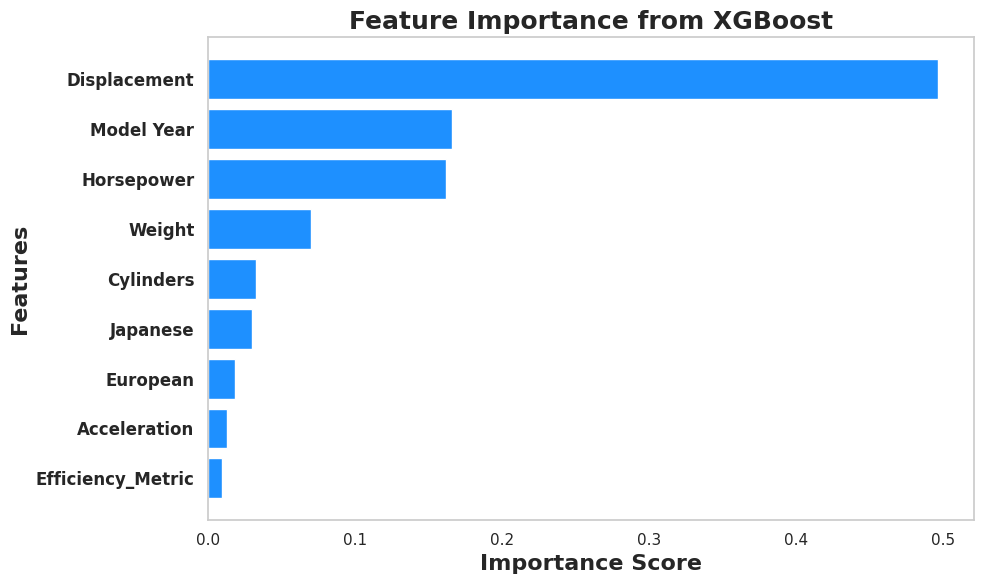

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
feature_importance = model.feature_importances_

# Create a sorted list of feature names and their importance
features = X_train.columns
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], feature_importance[sorted_idx], color='dodgerblue')

# Titles and labels with increased font size and bold text
plt.title('Feature Importance from XGBoost', fontsize=18, fontweight='bold')
plt.xlabel('Importance Score', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove grid lines
plt.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()

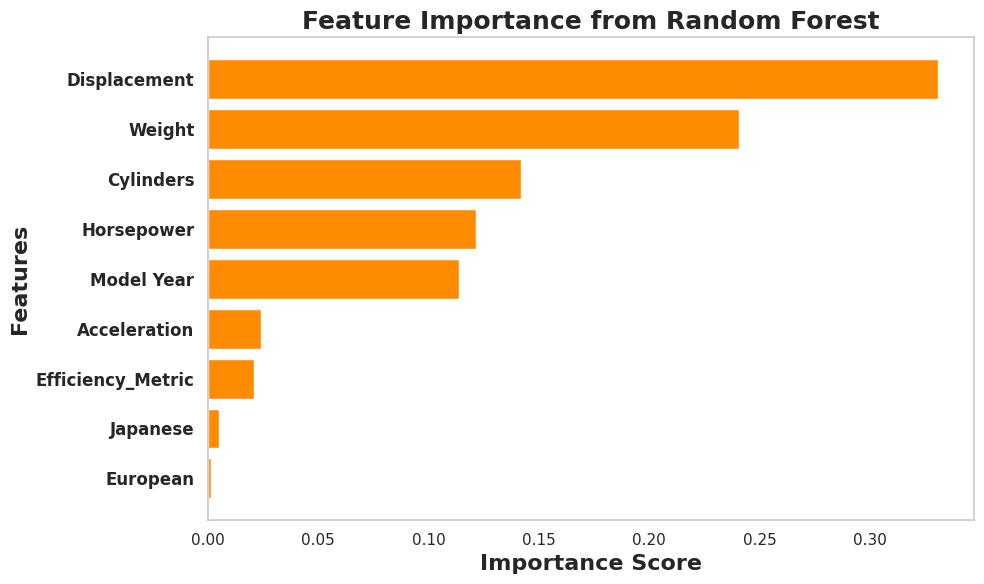

In [ ]:
# Extract feature importances
feature_importance = rf_model.feature_importances_

# Sort and plot
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx], color='darkorange')

# Titles and labels with increased font size and bold text
plt.title('Feature Importance from Random Forest', fontsize=18, fontweight='bold')
plt.xlabel('Importance Score', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove grid lines
plt.grid(False)
plt.tight_layout()
plt.show()




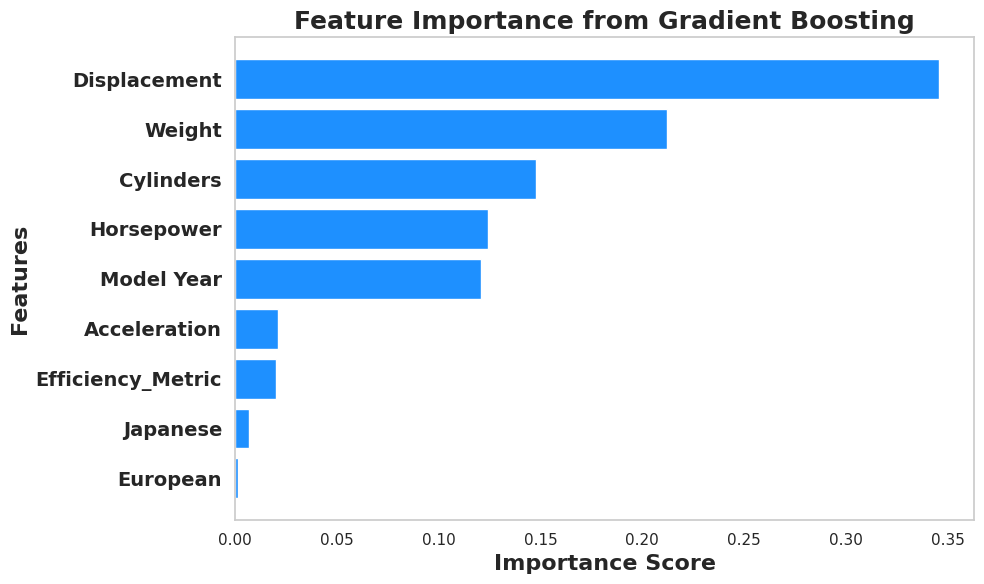

In [ ]:
# Get feature importance scores from the trained Gradient Boosting Regressor model
feature_importance = gbr_model.feature_importances_

# Create a sorted list of feature names and their importance
features = X_train.columns
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], feature_importance[sorted_idx], color='dodgerblue')

# Titles and labels with increased font size and bold text
plt.title('Feature Importance from Gradient Boosting', fontsize=18, fontweight='bold')
plt.xlabel('Importance Score', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')

# Make individual feature labels bold
plt.yticks(fontsize=14, fontweight='bold')

# Remove grid lines
plt.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()

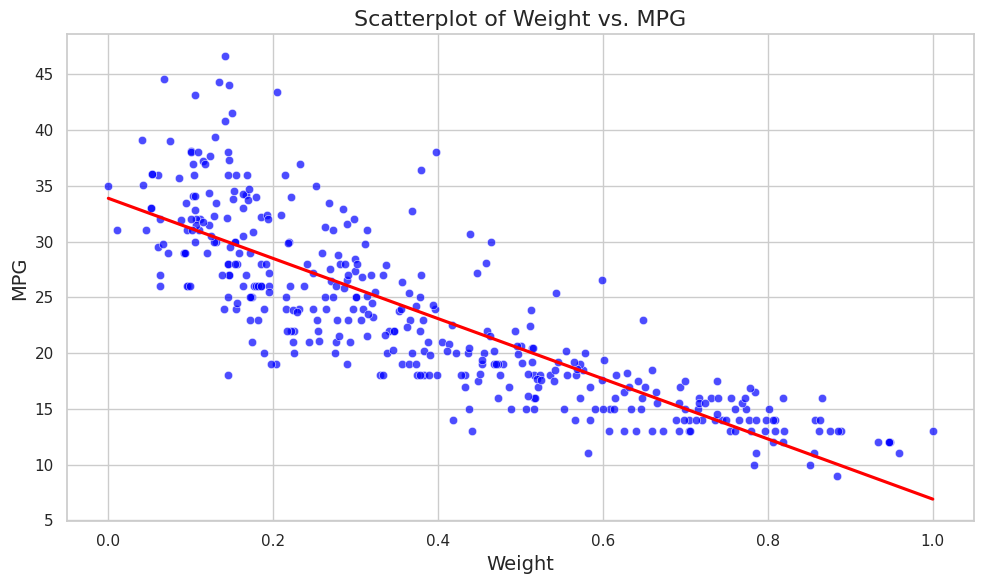

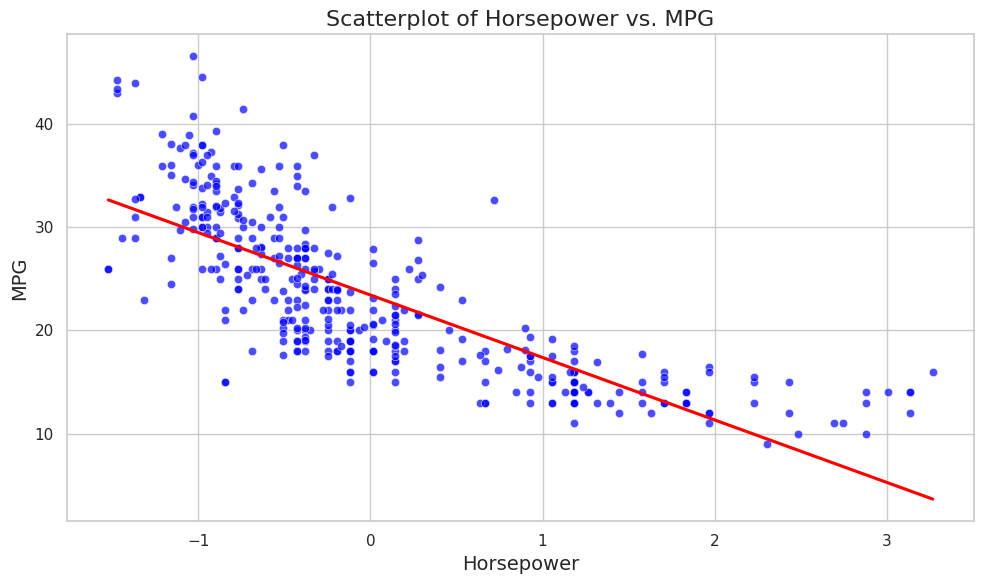

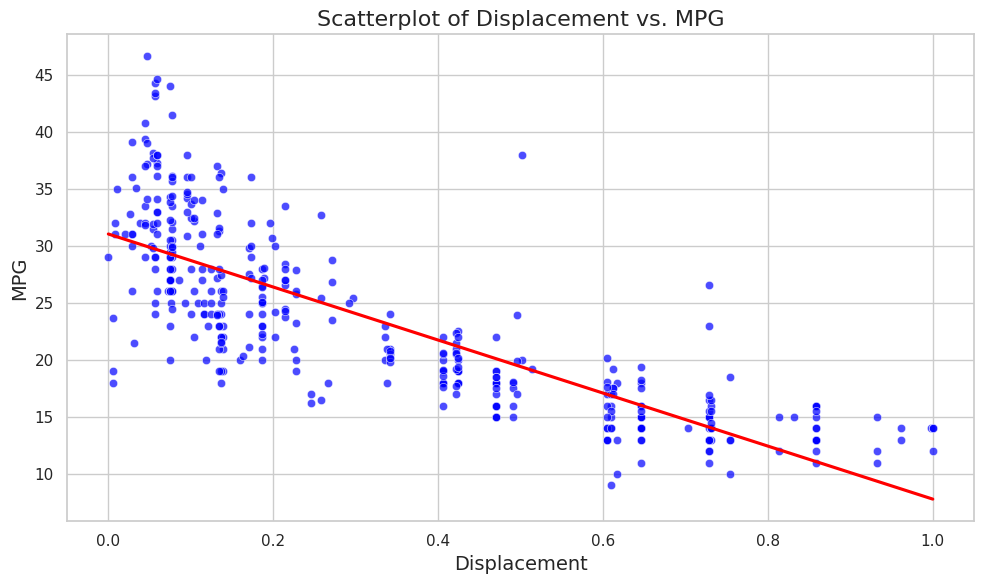

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplots for top predictors
top_predictors = ['Weight', 'Horsepower', 'Displacement']

for predictor in top_predictors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictor, y='MPG', data=auto_mpg_data, color='blue', alpha=0.7)
    sns.regplot(x=predictor, y='MPG', data=auto_mpg_data, scatter=False, color='red', ci=None)
    plt.title(f'Scatterplot of {predictor} vs. MPG', fontsize=16)
    plt.xlabel(predictor, fontsize=14)
    plt.ylabel('MPG', fontsize=14)
    plt.tight_layout()
    plt.show()
